# **In this notebook I intend to explore a dataset looking at different types of Ramen. I intend to do some basic exploratory data analysis and see what I can learn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['font.size'] = '15'

In [2]:
df=pd.read_csv('ramen-ratings.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


Concerned that some of the catergories I would expect to be numeric are objects, espcially the stars

In [4]:
df.Stars.unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [5]:
df.Stars.replace('Unrated',np.nan,inplace=True)

In [6]:
df['Stars'] = pd.to_numeric(df.Stars)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2580 non-null   int64  
 1   Brand     2580 non-null   object 
 2   Variety   2580 non-null   object 
 3   Style     2578 non-null   object 
 4   Country   2580 non-null   object 
 5   Stars     2577 non-null   float64
 6   Top Ten   41 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 141.2+ KB


Thats better, now the stars are listed as numeric, lets recheck the dataframe

In [7]:
df.head(5)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


**Initial thoughts**

The review number column appears to just be an index so I will drop that. It seems like we could have a lot of infomation in the Variety column so it would be good to do some feature extraction on that. First, however, I want to do some basic exploratory data analysis to better understand the raw data

In [8]:
df.drop('Review #',axis=1,inplace=True)

In [9]:
print('The number of unique Brands is '+ str(len(df.Brand.unique())))
print('The number of unique countrys is '+ str(len(df.Country.unique())))

The number of unique Brands is 355
The number of unique countrys is 38


In [10]:
df_sorted = df.groupby('Country').count().sort_values('Brand',ascending=False).Brand

In [11]:
df_sorted = df_sorted.reset_index().copy()

<BarContainer object of 38 artists>

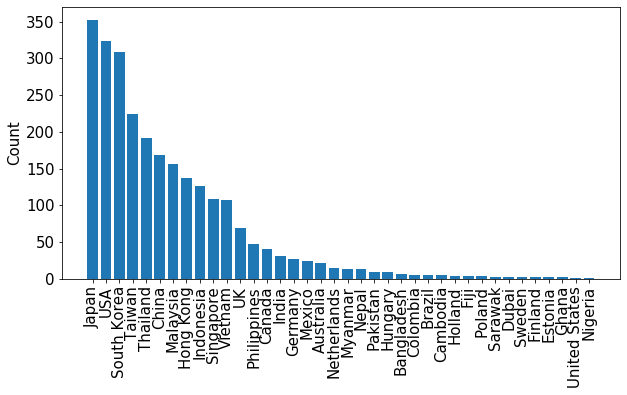

In [12]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.bar(df_sorted.Country,df_sorted.Brand)

**Now I want to see the average ramen rating per country, and also add infomation on how many ramens are produced per country**

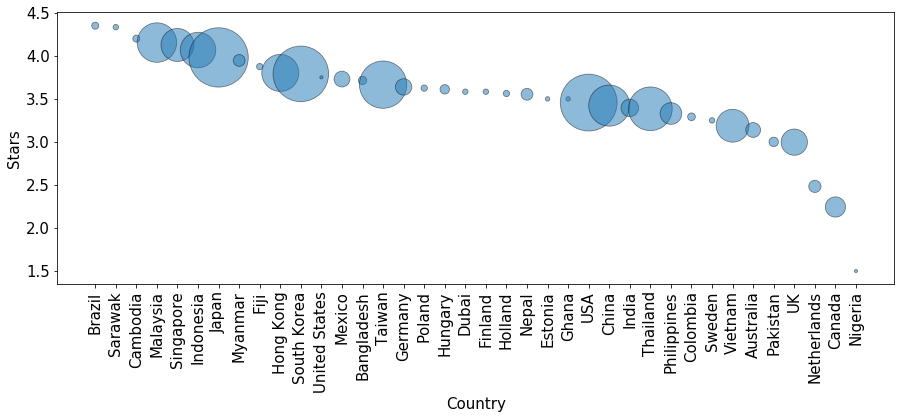

In [13]:
df_ave_stars= df[['Country','Stars']].groupby('Country').mean().sort_values('Stars',ascending=False).reset_index()
df_joined = df_ave_stars.set_index('Country').join(df_sorted.set_index('Country')).reset_index()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
#plt.hist(df_ave_stars.Stars,bins = 15)
plt.ylabel('Average Ramen Rating')
sizes = dict(zip(df_joined.Country,df_joined.Brand.values*10))
sns.scatterplot('Country','Stars', data=df_joined,
                size='Country',
                sizes=sizes,
                legend=False,
                alpha=0.5,
                edgecolor='black',
                palette = 'Set1'
                )


/Users/louismclaxton/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/louismclaxton/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Number')

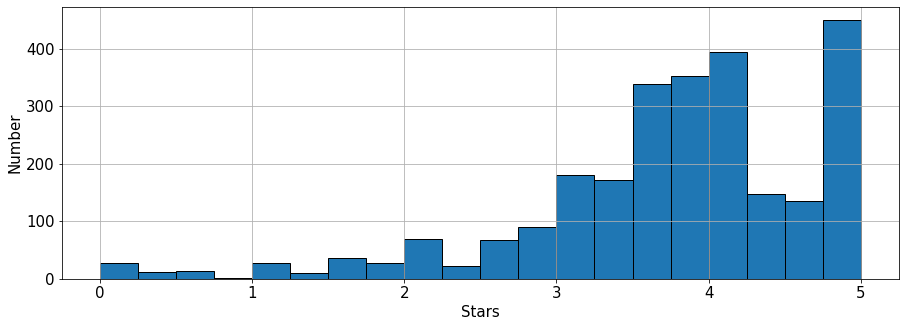

In [14]:
plt.figure(figsize=(15,5))
plt.grid()
plt.hist(df.Stars,bins=20,edgecolor='k',align='mid')
plt.xlabel('Stars')
plt.ylabel('Number')

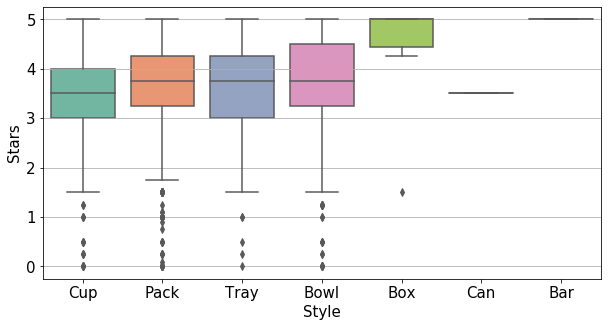

In [15]:
df_ave_stars_style = df[['Style','Stars']].groupby('Style').mean().sort_values('Stars',ascending=False).reset_index()
plt.figure(figsize=(10,5))
#plt.hist(df_ave_stars.Stars,bins = 15)
plt.ylabel('Average Ramen Rating')
plt.grid()
sns.boxplot(df.Style,df.Stars,palette = 'Set2')


# Now to do some feature extraction from the variety column. It would be good to try and get an idea of flavour

**First I need to remove the punctuation**

In [16]:
import string 
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [17]:
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x: remove_punctuation(x.lower()))

**Now to remove stopwords such as 'the', 'and' etc...**

In [18]:
from nltk.tokenize import RegexpTokenizer

In [19]:
tokenizer = RegexpTokenizer(r'\w+')
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [20]:
df.Variety

0                             [ts, restaurant, tantanmen]
1       [noodles, spicy, hot, sesame, spicy, hot, sesa...
2                      [cup, noodles, chicken, vegetable]
3                     [gge, ramen, snack, tomato, flavor]
4                                      [singapore, curry]
                              ...                        
2575    [hu, tiu, nam, vang, phnom, penh, style, asian...
2576                  [oriental, style, instant, noodles]
2577                                   [tom, yum, shrimp]
2578                            [tom, yum, chili, flavor]
2579                                        [miso, ramen]
Name: Variety, Length: 2580, dtype: object

In [21]:
from nltk.corpus import stopwords
specified_extra = ['noodles','noodle','flavour','artificial','ramen','instant','flavor','sauce','cup','bowl','rice']
def remove_stopwords(text):
    english_words = [w for w in text if w not in stopwords.words('english')]
    additional_words = [w for w in english_words if w not in specified_extra]
    return additional_words

In [22]:
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x: remove_stopwords(x))

**Now to recombine for analysis. I also take the opportunity to remove any repeats in the lists, before recombining**

In [23]:
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x: list(set(x)))
df.loc[:,'Variety'] = df.loc[:,'Variety'].apply(lambda x:" ".join(x))

In [24]:
# Begin vectorisation
from sklearn.feature_extraction.text import CountVectorizer

Specifiy the number of words to list

In [25]:
# Might take awhile...
max_feature_length = 10
top_words = []


Now to generate the sparce matrix with all the top words contained

In [26]:

bow_transformer = CountVectorizer(max_features=max_feature_length,ngram_range=(1,1)).fit(df.loc[:,'Variety'])
bow = bow_transformer.transform([' '.join(df.loc[:,'Variety'].values)])#This joins all the words in all the rows 


Now to extract the top words and counts 

In [27]:

word_list = bow_transformer.get_feature_names()
count_list = bow.toarray().sum(axis=0) 
top_counts = pd.DataFrame(zip(word_list,count_list),columns=['term','count',])
top_counts.sort_values('count',axis=0,inplace=True, ascending=False)




In [28]:
top_counts

,term,count
1,chicken,328
8,spicy,269
0,beef,232
7,soup,196
9,tom,128
6,shrimp,127
2,curry,125
3,hot,118
4,mi,117
5,seafood,109


Create a new column with the flavours identified

In [29]:
df['flavour'] = df.Variety.apply(lambda y: np.array([x for x in y.split() if x in top_counts.term.values]))
df['flavour'] = df['flavour'].apply(lambda x :" ".join(x))

## Now I have the flavours identified, I want to see how it varies with the rating

First I create a new dataframe, with the flavours spilt and add the rating column 

In [30]:
flavour = df['flavour'].str.split(' ', 3,expand=True)

In [31]:
flavour['stars'] = df['Stars']
flavour.replace('',np.nan,inplace=True)
flavour.replace('tom','tom yum',inplace=True) # Change tom to tom yum 

In [32]:
flavour['flavour'] = flavour.iloc[:,0]

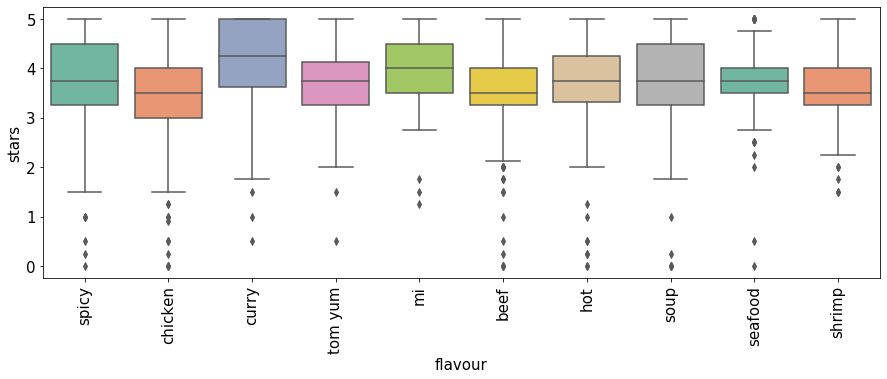

In [33]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.boxplot('flavour','stars',data=flavour, palette = 'Set2')

**It seems that curry noodles are often rated highly. Seafood and shrimp along with chicken seem to be generally worse.** Seeing as some rows also have secondary flavours, this could be a great predictor of ratings, along with country, style and brand.

## From here I begin to make dummy variables for the flavour and try and predict the rating.

Now to create dummy variables for the top words found

As there are a large number of countries and brands I use the BaseN encoder to reduce the dimentionality. For style I simply use get dummies.

In [34]:
import category_encoders as ce

In [35]:
encoder = ce.BaseNEncoder(cols=['Brand'],return_df=True,base=5)
data_encoded_brand = encoder.fit_transform(df.Brand)

In [36]:
encoder = ce.BaseNEncoder(cols=['Country'],return_df=True,base=5)
data_encoded_Country = encoder.fit_transform(df.Country)

In [37]:
data_encoded_styles = pd.get_dummies(data=df.Style,drop_first=True)

In [38]:
encoder = ce.BaseNEncoder(cols=['flavour'],return_df=True,base=5)
data_encoded_flavour = encoder.fit_transform(flavour.flavour)

In [39]:
final_cleaned = data_encoded_flavour.join(data_encoded_brand).join(data_encoded_styles).join(data_encoded_Country)
final_cleaned['Stars'] = df.Stars

Now to check that all columns are numeric and ready to be used in prediction

In [40]:
final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   flavour_0  2580 non-null   int64  
 1   flavour_1  2580 non-null   int64  
 2   flavour_2  2580 non-null   int64  
 3   Brand_0    2580 non-null   int64  
 4   Brand_1    2580 non-null   int64  
 5   Brand_2    2580 non-null   int64  
 6   Brand_3    2580 non-null   int64  
 7   Brand_4    2580 non-null   int64  
 8   Bowl       2580 non-null   uint8  
 9   Box        2580 non-null   uint8  
 10  Can        2580 non-null   uint8  
 11  Cup        2580 non-null   uint8  
 12  Pack       2580 non-null   uint8  
 13  Tray       2580 non-null   uint8  
 14  Country_0  2580 non-null   int64  
 15  Country_1  2580 non-null   int64  
 16  Country_2  2580 non-null   int64  
 17  Country_3  2580 non-null   int64  
 18  Stars      2577 non-null   float64
dtypes: float64(1), int64(12), uint8(6)
memory usage:

Flavour_0, Brand_0 and Country_0 all appear to have no values

In [41]:
final_cleaned.drop(['flavour_0','Brand_0','Country_0'],axis=1,inplace=True)

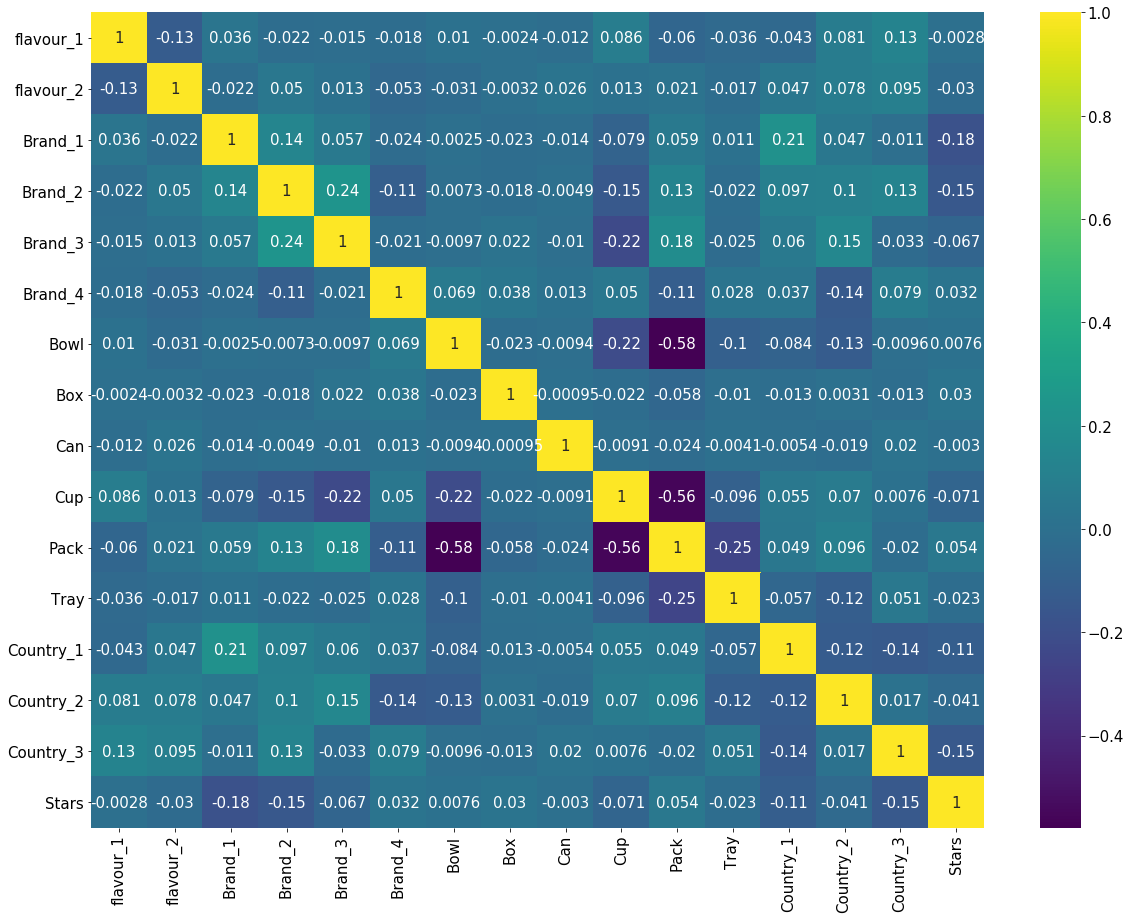

In [42]:
plt.figure(figsize=(20,15))
sns.heatmap(final_cleaned.corr(),annot=True,cmap='viridis')

**Overall it actually seems like nothing is very correlated to stars, it therefore seems like machine learning models may struggle to predict the rating of Ramen.** Nonetheless, I apply some to confirm this hypothesis.

# Now to employ some ML techniques to predict the rating 

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
final_cleaned.dropna(inplace=True)
x = final_cleaned.iloc[:,0:-1].values
y = final_cleaned.Stars.values

In [46]:
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size=0.25,)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
y_predict = model.predict(x_test)

(1932, 15)

(-0.5, 5.5)

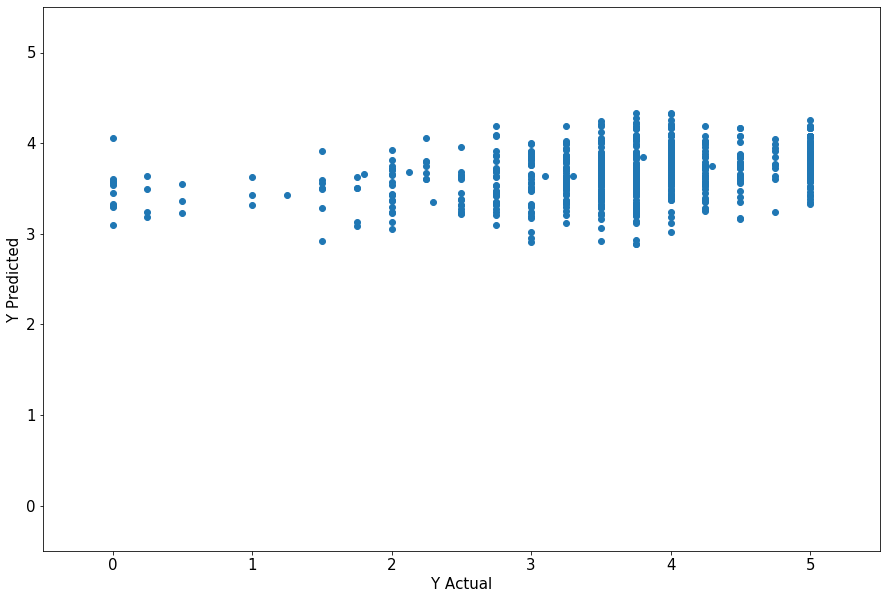

In [49]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_predict)
plt.xlim([-0.5,5.5])
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.ylim([-0.5,5.5])

In [50]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [51]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred = model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.1331821319567505
RMSE value for k=  2 is: 1.0827380594706906
RMSE value for k=  3 is: 0.9954481350949845
RMSE value for k=  4 is: 0.9913919722469307
RMSE value for k=  5 is: 0.9810040932675826
RMSE value for k=  6 is: 0.9686407964066935
RMSE value for k=  7 is: 0.9664155757340407
RMSE value for k=  8 is: 0.9663312045312287
RMSE value for k=  9 is: 0.957122579612985
RMSE value for k=  10 is: 0.956952061527648
RMSE value for k=  11 is: 0.9620406471348815
RMSE value for k=  12 is: 0.9595256001913031
RMSE value for k=  13 is: 0.9582431906279079
RMSE value for k=  14 is: 0.9637527135284302
RMSE value for k=  15 is: 0.9598359346956964
RMSE value for k=  16 is: 0.963358695046128
RMSE value for k=  17 is: 0.9626684613658064
RMSE value for k=  18 is: 0.9647566182452864
RMSE value for k=  19 is: 0.96264183987675
RMSE value for k=  20 is: 0.9642298735420965


(-0.5, 5.5)

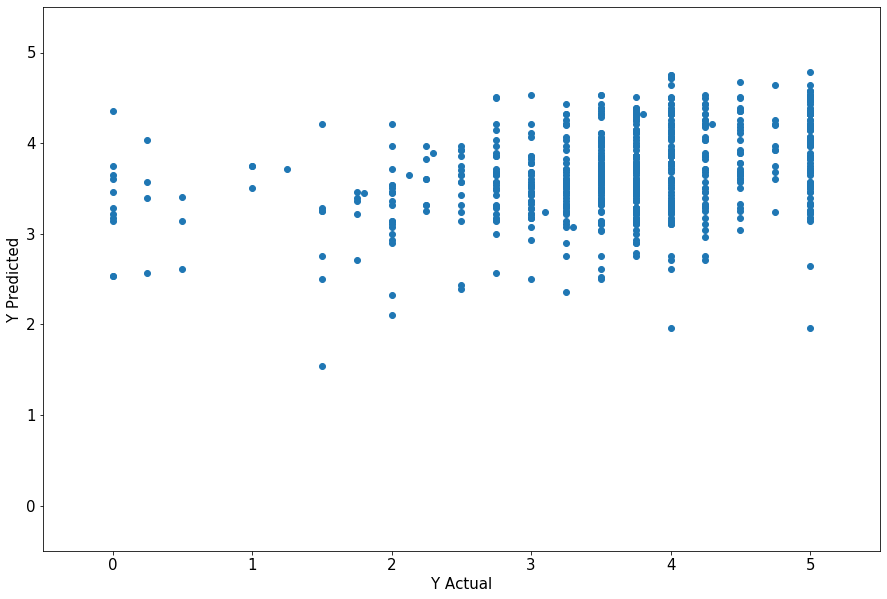

In [52]:
model = neighbors.KNeighborsRegressor(n_neighbors = 7)
model.fit(x_train, y_train)  #fit the model
y_predict_KNN = model.predict(x_test) #make prediction on test set
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_predict_KNN)
plt.xlim([-0.5,5.5])
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.ylim([-0.5,5.5])

**As I expected the traditional machine learning models struggle to predict the rating of the ramen. We could try deep learning here to confirm this, but i'm not too hopeful**

In [53]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/Users/louismclaxton/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/louismclaxton/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/louismclaxton/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/louismclaxton/anaconda3/l

In [55]:
model = Sequential()
model.add(Dense(8, input_dim=15, activation= "relu"))
model.add(Dense(10, activation= "relu"))
model.add(Dense(10, activation= "relu"))
model.add(Dense(5, activation= "relu"))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [56]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
history = model.fit(x_train, y_train, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1932/1932 [==============================] - 0s 141us/step - loss: 12.4173 - mean_squared_error: 12.4173
Epoch 2/100
1932/1932 [==============================] - 0s 59us/step - loss: 6.2635 - mean_squared_error: 6.2635
Epoch 3/100
1932/1932 [==============================] - 0s 59us/step - loss: 2.9936 - mean_squared_error: 2.9936
Epoch 4/100
1932/1932 [==============================] - 0s 61us/step - loss: 2.0229 - mean_squared_error: 2.0229
Epoch 5/100
1932/1932 [==============================] - 0s 61us/step - loss: 1.5771 - mean_squared_error: 1.5771
Epoch 6/100
1932/1932 [==============================] - 0s 54us/step - loss: 1.3771 - mean_squared_error: 1.3771
Epoch 7/100
1932/1932 [==============================] - 0s 51us/step - loss: 1.2485 - mean_squared_error: 1.2485
Epoch 8/100
1932/1932 [==============================] - 0s 57us/step - loss: 1.1749 - mean_squared_error: 1.1749
Epoch 9/100
1932/1932 [==============

1932/1932 [==============================] - 0s 48us/step - loss: 0.8218 - mean_squared_error: 0.8218
Epoch 70/100
1932/1932 [==============================] - 0s 58us/step - loss: 0.8192 - mean_squared_error: 0.8192
Epoch 71/100
1932/1932 [==============================] - 0s 66us/step - loss: 0.8166 - mean_squared_error: 0.8166
Epoch 72/100
1932/1932 [==============================] - 0s 63us/step - loss: 0.8179 - mean_squared_error: 0.8179
Epoch 73/100
1932/1932 [==============================] - 0s 60us/step - loss: 0.8168 - mean_squared_error: 0.8168
Epoch 74/100
1932/1932 [==============================] - 0s 51us/step - loss: 0.8182 - mean_squared_error: 0.8182
Epoch 75/100
1932/1932 [==============================] - 0s 63us/step - loss: 0.8152 - mean_squared_error: 0.8152
Epoch 76/100
1932/1932 [==============================] - 0s 95us/step - loss: 0.8131 - mean_squared_error: 0.8131
Epoch 77/100
1932/1932 [==============================] - 0s 61us/step - loss: 0.8196 - mean_

In [ ]:
pred_train= model.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

y_pred_NN = model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

Seems the model may be slightly over fitting the data given the MSE is higher for the test set.

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0,100),history.history.get('loss'))
plt.xlabel('Epoch')
plt.ylabel('MSE')

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_NN)
plt.xlim([-0.5,5.5])
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.ylim([-0.5,5.5])

Overall given the lack of correlation between the predictors and the rating it has proved hard to generate an accurate machine learning model. Nonetheless, its been fun to use some NLP, ML and generally explore the Ramen Data set